In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

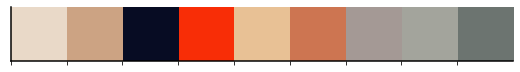

In [9]:
#Parameters for Plots
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

#Colors for charts
colors = ["#e9d9c8","#cca383","#070c23","#f82d06","#e8c195","#cd7551","#a49995","#a3a49c","#6c7470"]
sns.palplot(sns.color_palette(colors))

In [10]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
pn_df = pd.read_csv('patient_notes_1.csv')
feat_df = pd.read_csv('features.csv')

In [11]:
##EDA

In [12]:
#Train
##Feature annotations for 1000 of the patient notes, 100 for each of ten cases.

##id - Unique identifier for each patient note / feature pair.
##pn_num - The patient note annotated in this row.
##feature_num - The feature annotated in this row.
##case_num - The case to which this patient note belongs.
##annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note
##location - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.

In [13]:
train_df

id  case_num  pn_num  feature_num  \
0      00016_000         0      16            0   
1      00016_001         0      16            1   
2      00016_002         0      16            2   
3      00016_003         0      16            3   
4      00016_004         0      16            4   
...          ...       ...     ...          ...   
14295  95333_912         9   95333          912   
14296  95333_913         9   95333          913   
14297  95333_914         9   95333          914   
14298  95333_915         9   95333          915   
14299  95333_916         9   95333          916   

                                     annotation              location  
0              ['dad with recent heart attcak']           ['696 724']  
1                 ['mom with "thyroid disease']           ['668 693']  
2                            ['chest pressure']           ['203 217']  
3          ['intermittent episodes', 'episode']  ['70 91', '176 183']  
4      ['felt as if he were going to pass out']           ['222 258']  
...                                         ...                   ...  
14295                                        []                    []  
14296                                        []                    []  
14297                              ['photobia']           ['274 282']  
14298                      ['no sick contacts']           ['421 437']  
14299                      ['Subjective fever']           ['314 330']  

[14300 rows x 6 columns]

In [14]:
print(f'\033[93mTrain Dataframe got {train_df.shape[0]} rows and {train_df.shape[1]} columns. It has {train_df.isna().sum().sum()} missing values')

Train Dataframe got 14300 rows and 6 columns. It has 0 missing values


In [15]:
train_df.nunique()

id             14300
case_num          10
pn_num          1000
feature_num      143
annotation      5201
location        7534
dtype: int64

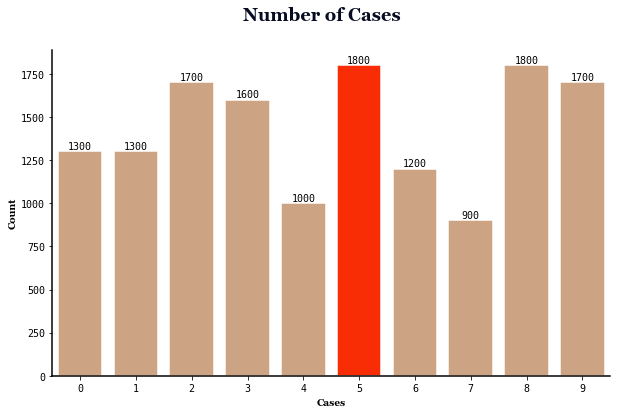

In [16]:
#plot
A = sns.countplot(train_df['case_num'],
              color=colors[1],
              edgecolor='white',
              linewidth=1.5,
              saturation=1.5)

#Patch
patch_h = []    
for patch in A.patches:
    reading = patch.get_height()
    patch_h.append(reading)
    
idx_tallest = np.argmax(patch_h)    
A.patches[idx_tallest].set_facecolor(colors[3])

#Lables
plt.ylabel('Count', weight='semibold', fontname = 'Georgia')
plt.xlabel('Cases', weight='semibold', fontname = 'Georgia')
plt.suptitle('Number of Cases', fontname = 'Georgia', weight='bold', size = 18, color = colors[2])
A.bar_label(A.containers[0], label_type='edge')

plt.show()

In [17]:
test_df

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [18]:
print(f'\033[93mTest Dataframe got {test_df.shape[0]} rows and {test_df.shape[1]} columns. It has {test_df.isna().sum().sum()} missing values')

Test Dataframe got 5 rows and 4 columns. It has 0 missing values


In [19]:
test_df.nunique()

id             5
case_num       1
pn_num         1
feature_num    5
dtype: int64

In [20]:
##Patient Notes
##A collection of about 40,000 Patient Note history portions. Only a subset of these have features annotated. You may wish to apply unsupervised learning techniques on the notes without annotations. The patient notes in the test set are not included in the public version of this file.

##pn_num - A unique identifier for each patient note.
##case_num - A unique identifier for the clinical case a patient note represents.
##pn_history - The text of the encounter as recorded by the test taker.

In [21]:
pn_df

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...
...,...,...,...
42141,95330,9,Ms. Madden is a 20 yo female presenting w/ the...
42142,95331,9,A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143,95332,9,Ms. Madden is a 20yo female who presents with ...
42144,95333,9,Stephanie madden is a 20 year old woman compla...


In [22]:
print(f'\033[93mPatient Notes got {pn_df.shape[0]} rows and {pn_df.shape[1]} columns. It has {pn_df.isna().sum().sum()} missing values.')

Patient Notes got 42146 rows and 3 columns. It has 0 missing values.


In [23]:
pn_df.nunique()

pn_num        42146
case_num         10
pn_history    42146
dtype: int64

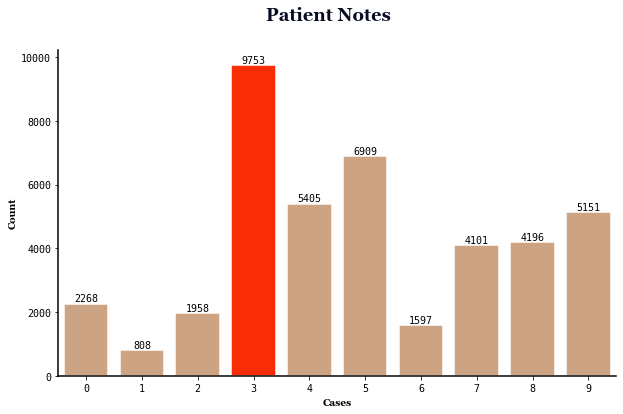

In [24]:
#plot
A = sns.countplot(pn_df['case_num'],color=colors[1],edgecolor='white',linewidth=1.5,saturation=1.5)

#Patch
patch_h = []    
for patch in A.patches:
    reading = patch.get_height()
    patch_h.append(reading)
    
idx_tallest = np.argmax(patch_h)    
A.patches[idx_tallest].set_facecolor(colors[3])

#Lables
plt.ylabel('Count', weight='semibold', fontname = 'Georgia')
plt.xlabel('Cases', weight='semibold', fontname = 'Georgia')
plt.suptitle('Patient Notes', fontname = 'Georgia', weight='bold', size = 18, color = colors[2])
A.bar_label(A.containers[0], label_type='edge')

plt.show()

In [25]:
#creating a function for patient notes
def patient_note(patient_no):
    note = pn_df["pn_history"].iloc[patient_no]
    print(f'\033[94m{note}')

In [26]:
patient_note(9000)

c/o: "stomach problem"
HPI: 35 yo previously healthy man presented with epigastirc pain for 2 months. The pain is new-onset, 5/10, intermitten, burnning, associted with nausea,  usually last about 1-2hrs, and getting progressively worse. Pt had tried tummes that helped a little and nothing really makes the pain worse. no association with food. the pain wakes him up at night. also noted stool is darker brown than usual since two weeks ago, no mucus or bright red blood. no fever, chills, vomiting. 
PMH: chronic back pain
allergy: none
Meds: motrin once/week for the back pain
PSH/hospitalization: none
FH: uncle with bleeding ulcer
SH: recently divorced, live by himself, smokes 1/2 to 1 ppd for the past 20 yrs. used to drink 1-2 beer/week but no drinking since onset of epigastric pain, never had recreational drug use
ROS: see HPI


In [27]:
#Features


In [28]:
##The rubric of features (or key concepts) for each clinical case.

##feature_num - A unique identifier for each feature.
##case_num - A unique identifier for each case.
##feature_text - A description of the feature.

In [29]:
feat_df

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
...,...,...,...
138,912,9,Family-history-of-migraines
139,913,9,Female
140,914,9,Photophobia
141,915,9,No-known-illness-contacts


In [30]:
print(f'\033[93mFeatures Dataframe got {feat_df.shape[0]} rows and {feat_df.shape[1]} columns. It has {feat_df.isna().sum().sum()} missing values')

Features Dataframe got 143 rows and 3 columns. It has 0 missing values


In [31]:
feat_df.nunique()

feature_num     143
case_num         10
feature_text    131
dtype: int64

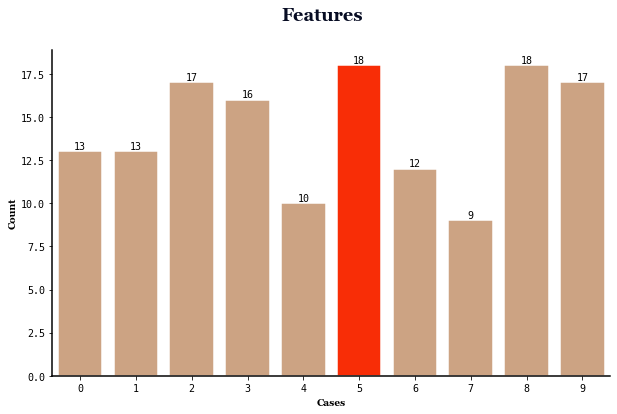

In [32]:
#plot
A = sns.countplot(feat_df['case_num'],
              color=colors[1],
              edgecolor='white',
              linewidth=1.5,
              saturation=1.5)


#Patch
patch_h = []    
for patch in A.patches:
    reading = patch.get_height()
    patch_h.append(reading)
    
idx_tallest = np.argmax(patch_h)    
A.patches[idx_tallest].set_facecolor(colors[3])



#Lables
plt.ylabel('Count', weight='semibold', fontname = 'Georgia')
plt.xlabel('Cases', weight='semibold', fontname = 'Georgia')
plt.suptitle('Features', fontname = 'Georgia', weight='bold', size = 18, color = colors[2])
A.bar_label(A.containers[0], label_type='edge')

plt.show()